In [1]:
import numpy as np

samples = 1000
xs = np.linspace(0, 10, samples)

signal = np.sin(0.5 * xs * (2 * np.pi)) + np.sin(10 * (xs * (2*np.pi)))
time_vary = np.sin(3 * (xs * (2*np.pi)))
time_vary[500:] = 0
signal = signal + time_vary


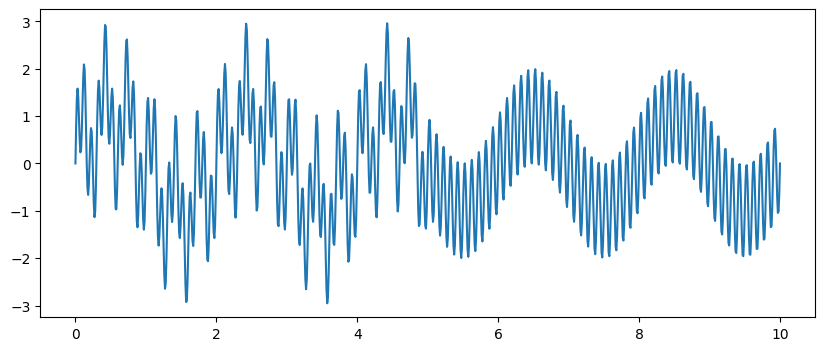

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(xs, signal)
plt.show()

In [28]:
def harr_hp(period):
    val = 1 / np.power(period, 1/2)
    arr = np.zeros(period)
    arr[:period // 2] = -val
    arr[period // 2:] = val
    return arr

def harr(period):
    val = 1 / np.power(period, 1/2)
    arr = np.zeros(period)
    arr[:period] = val
    return arr

In [29]:
def apply_harr(signal, period, hp=False):
    wavelet = None
    if hp:
        wavelet = harr_hp(period)
    else:
        wavelet = harr(period)
    # print(wavelet)
    
        
    return np.convolve(signal, wavelet)

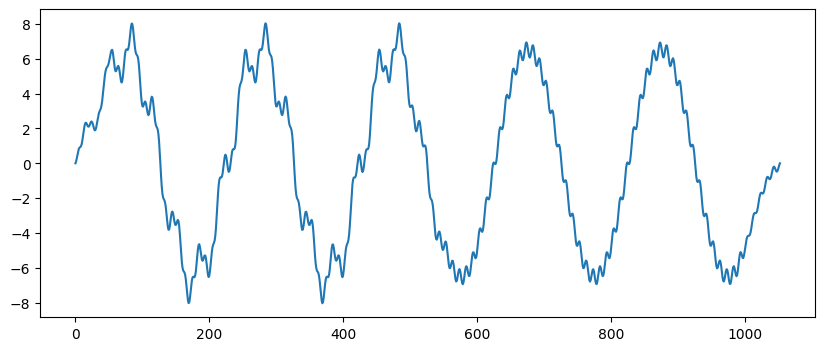

In [39]:
low_passed = apply_harr(signal, 55)
plt.figure(figsize=(10, 4))
plt.plot(low_passed)
plt.show()

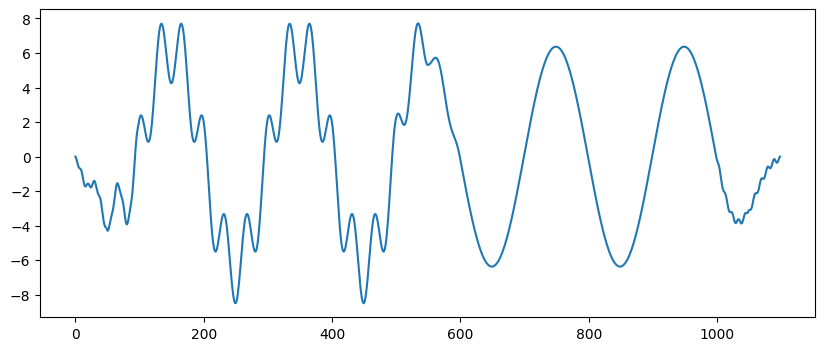

In [42]:
high_passed = apply_harr(signal, 100, hp=True)
plt.figure(figsize=(10, 4))
plt.plot(high_passed)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (496,) + inhomogeneous part.

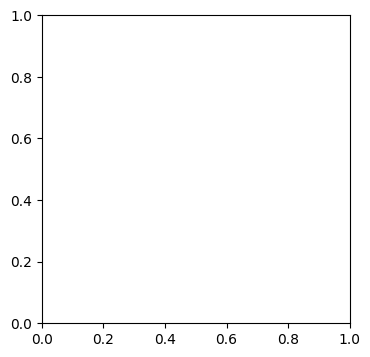

In [41]:
all_transformed = []

for i in range(4, 500):
    transformed = apply_harr(signal, i)
    all_transformed.append(transformed)
    
plt.figure(figsize=(10, 4))
plt.imshow(all_transformed, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
_